In [1]:
# Dependencies
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
from mydata import *
from collections import Counter

In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Define a funtion to get home feed tweets for certain page number
def get_public_tweets(Page_number):
    # generate empty list to hold tweets
    public_tweets = []
    # loop through all pages and request tweets using tweepy API
    for x in range(Page_number):
        response = api.user_timeline("SubwayStats", page=x)
        public_tweets.extend(response)
    return public_tweets

In [4]:
# Define a funtion to filter tweets with important message
def filter_tweets_info(Tweets_list):
    # generate empty list to hold useful tweets
    useful_tweets = []
    # Loop through all tweets
    for tweet in Tweets_list:
        # Break tweet text into a list of lowercase words
        tweet_text = tweet["text"].lower().split(" ")
        # Print the tweet text only if it contains the word "delays" or "change"
        if("delays" in tweet_text or "change" in tweet_text):
#             print(tweet["text"].lower())
            useful_tweets.append(tweet)
    return useful_tweets

In [5]:
# Define a function to find delayed train info
def find_train_info(Tweets_list):
    # generate empty lists to hold train names
    name_list = []
    train_names = []
    # loop through all tweets
    for tweet in Tweets_list:
        # Loop through hashtags to extract the train names
        for hashtag in tweet['entities']['hashtags']:
            # Extract the hashtag's text, and set it to lower case
            name = hashtag['text'].lower()
            name_list.append(name)
    # loop through names extracted from hashtags
    for name in name_list:
        # Remove all hashtags that are extraneous
        if (name != "nycsubway" and name != "mta" and name != "nyc"):
            train_names.append(name)
    # generate train info
    delayed_trains = Counter(train_names)
    # convert to Pandas series
    delayed_train_info = pd.Series(delayed_trains)
    return delayed_train_info

In [6]:
# put functions together and get delayed train info
all_tweets = get_public_tweets(50)
useful_tweets = filter_tweets_info(all_tweets)
delayed_train_info = find_train_info(useful_tweets)

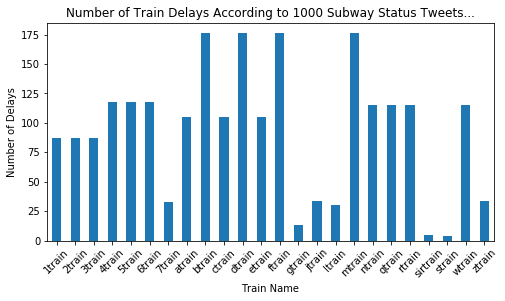

In [7]:
# Create a plot  
delayed_train_info.plot.bar(figsize=(8, 4), rot=45)
plt.ylabel("Number of Delays")
plt.xlabel("Train Name")
plt.title("Number of Train Delays According to 1000 Subway Status Tweets...")
plt.show()